<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter7/LDAmixture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.12


# Example 7.2
## Import modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource
from numpy.random import rand
from numpy.linalg import inv
print(np.__version__)

1.21.5


## Set random seed

In [3]:
np.random.seed(1357)

## Original Program

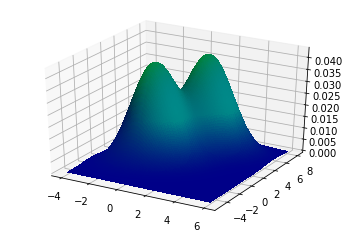

In [4]:
mu1 = np.array([0,0])
mu2 = np.array([2,4])
Sigma = np.array([[2,0.7],[0.7, 2]])
x, y = np.mgrid[-4:6:150j,-5:8:150j]
mvn1 = multivariate_normal( mu1, Sigma )
mvn2 = multivariate_normal( mu2, Sigma )

xy = np.hstack((x.reshape(-1,1),y.reshape(-1,1)))
z = 0.5*mvn1.pdf(xy).reshape(x.shape) +  0.5*mvn2.pdf(xy).reshape(x.shape)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
fig = plt.figure()

ax = fig.gca(projection='3d')
ls = LightSource(azdeg=180, altdeg=65)
cols = ls.shade(z, plt.cm.winter)
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0,
                       antialiased=False, facecolors=cols)
plt.savefig('LDApy.png',format='png',dpi=300, transparent=False,alpha=1)
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## LDA

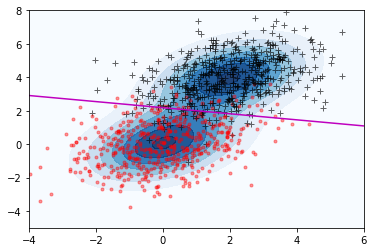

In [5]:
fig = plt.figure()
plt.contourf(x, y,z, cmap=plt.cm.Blues, alpha= 0.9,extend='both')
plt.ylim(-5.0,8.0)
plt.xlim(-4.0,6.0)
M = 1000


r = (rand(M,1) < 0.5)
for i in range(0,M):
    if r[i]:
       u = np.random.multivariate_normal(mu1,Sigma,1)
       plt.plot(u[0][0],u[0][1],'.r',alpha = 0.4)
    else:
       u = np.random.multivariate_normal(mu2,Sigma,1)
       plt.plot(u[0][0],u[0][1],'+k',alpha = 0.6)

a = 2*inv(Sigma) @ (mu2-mu1);
b = ( mu1.reshape(1,2) @ inv(Sigma) @ mu1.reshape(2,1)  
    - mu2.reshape(1,2) @ inv(Sigma) @mu2.reshape(2,1) )
xx = np.linspace(-4,6,100)
yy = (-(a[0]*xx +b)/a[1])[0]
plt.plot(xx,yy,'m')

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.savefig('LDA2py.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%